In [1]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC # Support Vector Classifier

In [ ]:
data_dict = pickle.load(open("../dataset/full_asl_dataset.pickle", 'rb'))
lengths = [len(sample) for sample in data_dict['data']]
print("Unique lengths of samples:", set(lengths))  # Useful debug

Unique lengths of samples: {84}


In [3]:
expected_length = 84
filtered_data = []
filtered_labels = []

for sample, label in zip(data_dict['data'], data_dict['labels']):
    if len(sample) == expected_length:
        filtered_data.append(sample)
        filtered_labels.append(label)

data = np.asarray(filtered_data)
labels = np.asarray(filtered_labels)

In [4]:
# Split the data into training and testing sets that each class has 10% of the class data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

In [5]:
randomforest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

In [6]:
randomforest_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [7]:
def visualize_model(model, x_test, y_test):
    # Predict the labels for the test set
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Visualize the misclassified samples in matrix form
    misclassified_indices = np.where(y_pred != y_test)[0]
    print(f"Misclassified samples: {len(misclassified_indices)} out of {len(y_test)}")
    
    # create a a classification report
    print(classification_report(y_test, y_pred))

    # Plot the true labels vs confused labels
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    plt.title("True vs Predicted Labels")
    plt.grid()
    # change the angle of the x-axis labels
    plt.xticks(rotation=40)
    plt.show()

Accuracy: 97.38%
Misclassified samples: 832 out of 31762
              precision    recall  f1-score   support

           A       0.98      0.98      0.98       883
           B       0.98      0.99      0.99       875
           C       0.97      0.98      0.98       833
           D       0.98      0.98      0.98       884
           E       0.97      0.98      0.98       847
           F       0.99      0.98      0.99       951
           G       0.99      0.98      0.98       894
           H       0.97      0.96      0.96       850
           I       0.98      0.98      0.98       870
        I-me       0.99      0.99      0.99       800
           K       0.96      0.96      0.96       921
           L       0.98      0.98      0.98       890
           M       0.91      0.92      0.92       748
           N       0.93      0.91      0.92       675
           O       0.98      0.97      0.98       846
           P       0.96      0.96      0.96       770
           Q       0.96 

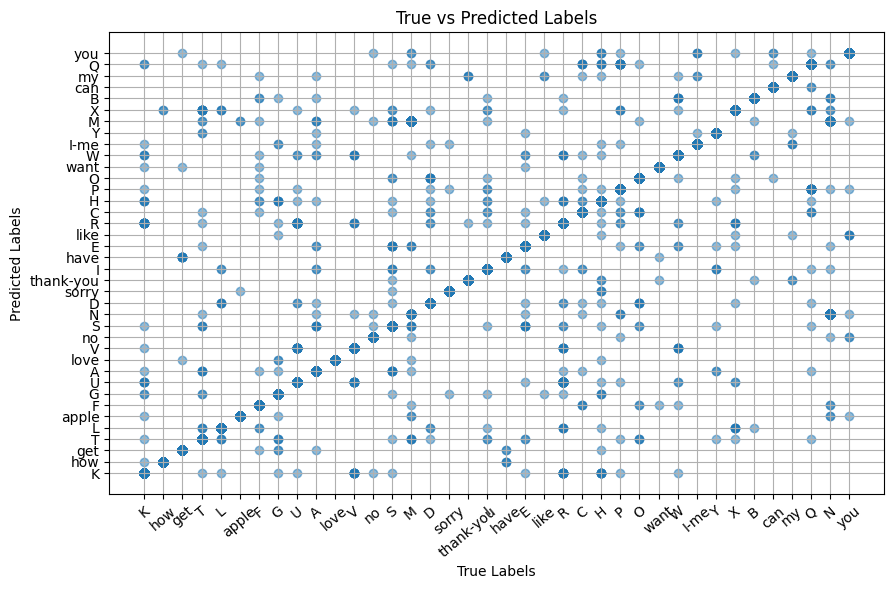

In [8]:
visualize_model(decision_tree_model, x_test, y_test)

Accuracy: 93.53%
Misclassified samples: 2056 out of 31762
              precision    recall  f1-score   support

           A       0.95      0.98      0.97       883
           B       0.97      0.99      0.98       875
           C       0.96      0.97      0.96       833
           D       0.96      0.97      0.96       884
           E       0.99      0.95      0.97       847
           F       1.00      0.99      0.99       951
           G       0.93      0.95      0.94       894
           H       0.93      0.92      0.92       850
           I       0.82      0.94      0.88       870
        I-me       0.94      0.93      0.94       800
           K       0.92      0.95      0.93       921
           L       0.95      0.94      0.95       890
           M       0.87      0.93      0.90       748
           N       0.98      0.84      0.90       675
           O       0.93      0.99      0.96       846
           P       0.97      0.91      0.94       770
           Q       0.91

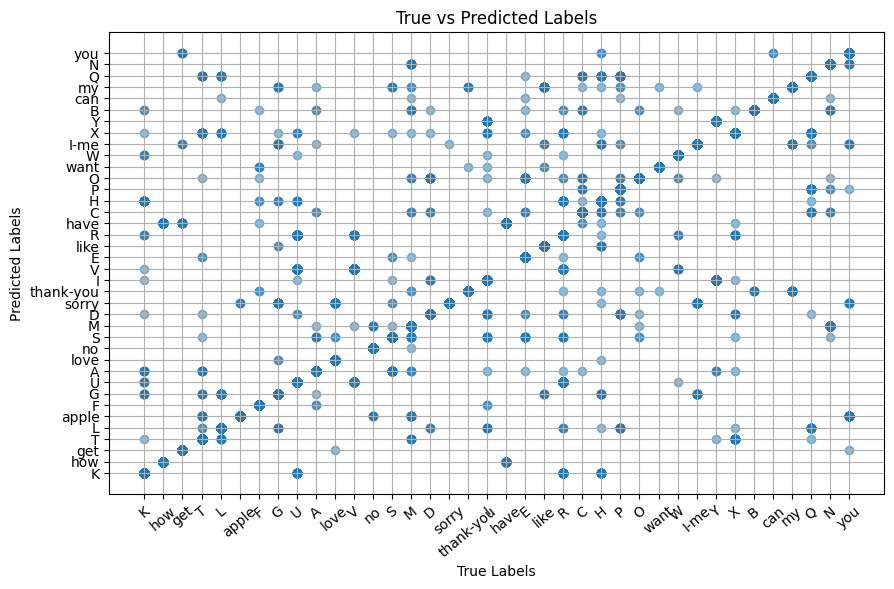

In [9]:
visualize_model(svm_model, x_test, y_test)

Accuracy: 99.15%
Misclassified samples: 270 out of 31762
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       883
           B       0.99      1.00      0.99       875
           C       0.99      0.99      0.99       833
           D       0.99      0.99      0.99       884
           E       0.99      0.99      0.99       847
           F       0.99      0.99      0.99       951
           G       0.99      1.00      1.00       894
           H       0.99      0.99      0.99       850
           I       0.99      0.99      0.99       870
        I-me       0.99      1.00      1.00       800
           K       1.00      0.98      0.99       921
           L       1.00      0.99      1.00       890
           M       0.94      0.97      0.96       748
           N       0.97      0.92      0.95       675
           O       0.98      0.99      0.99       846
           P       0.99      0.98      0.98       770
           Q       0.98 

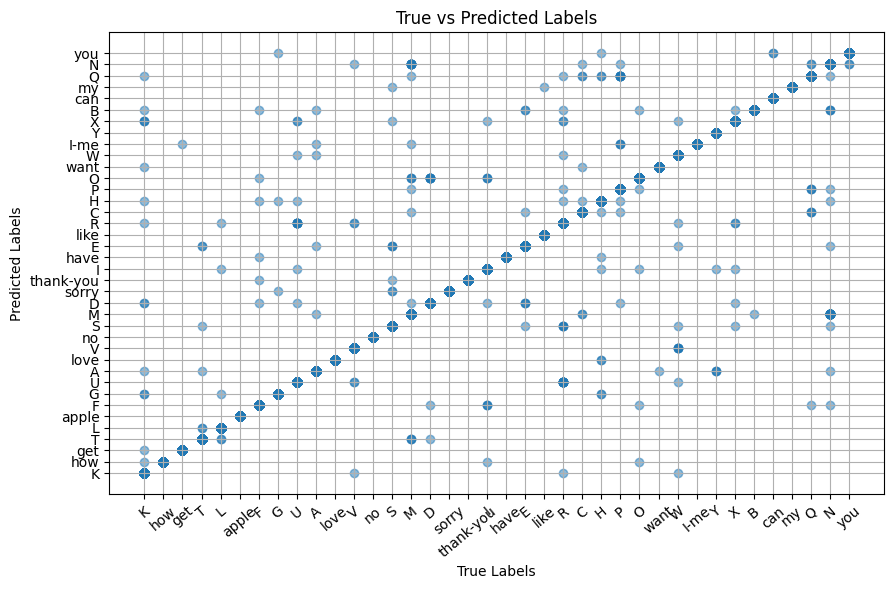

In [10]:
visualize_model(randomforest_model, x_test, y_test)

In [ ]:
# save the best model
with open('./model/randomforest_model.p', 'wb') as f:
    pickle.dump(randomforest_model, f)